# Definición de la clase

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

class PerceptronMultiCapa(nn.Module):
    def __init__(self):
        super(PerceptronMultiCapa, self).__init__()
        self.oculta1 = nn.Linear(in_features=784, out_features=512)
        self.oculta2 = nn.Linear(512, 10)
        self.softMax = nn.Softmax()
        self.dispositivo = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print("Perceptrón multicapa inicializado utilizando:",self.dispositivo)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.oculta1(x))
        x = self.oculta2(x)
        #x = self.softMax(self.oculta2(x))
        return x



# Crear los datasets de entrenamiento, validación y test

torch.Size([60000, 28, 28])


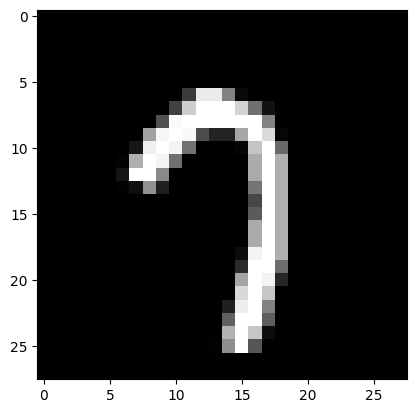

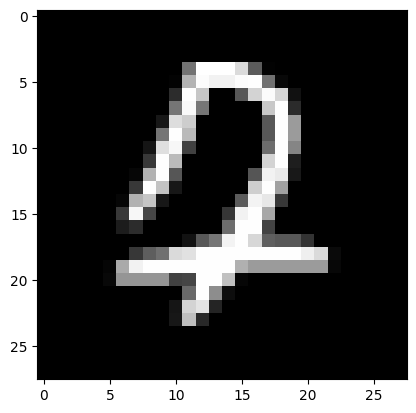

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random

SEED = 1
MAX_EPOCHS = 10
TAMANIO_BATCH = 32
transform = transforms.Compose([ #https://pytorch.org/vision/stable/transforms.html
    transforms.ToTensor(),
])

random.seed(SEED) 
torch.manual_seed(SEED)

datosEntrenamiento = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

#shufflear datosEntrenamiento
# https://pytorch.org/docs/stable/generated/torch.randperm.html

randomPermutation = torch.randperm(datosEntrenamiento.data.size(0))
datosEntrenamiento.data = datosEntrenamiento.data[randomPermutation]
datosEntrenamiento.targets = datosEntrenamiento.targets[randomPermutation]

print(datosEntrenamiento.data.size())
def showData(datosEntrenamiento, i): 
    plt.imshow(datosEntrenamiento.data[i], cmap='gray')
    plt.show()
[showData(datosEntrenamiento, i) for i in range(2)]

datosValidacion = datosEntrenamiento.data[:10000]

datosTest = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Pasar los datasets a DataLoader

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [8]:

trainLoader = torch.utils.data.DataLoader(datosEntrenamiento, batch_size=TAMANIO_BATCH, shuffle=True)

validationLoader = torch.utils.data.DataLoader(datosValidacion, batch_size=TAMANIO_BATCH, shuffle=False)

validationLoader = torch.utils.data.DataLoader(datosTest, batch_size=TAMANIO_BATCH, shuffle=False)

perceptronMultiCapa = PerceptronMultiCapa()
perceptronMultiCapa.to(perceptronMultiCapa.dispositivo)

Perceptrón multicapa inicializado utilizando: cuda


PerceptronMultiCapa(
  (oculta1): Linear(in_features=784, out_features=512, bias=True)
  (oculta2): Linear(in_features=512, out_features=10, bias=True)
  (softMax): Softmax(dim=None)
)

In [10]:


entropiaCruzada = nn.CrossEntropyLoss()
adam = optim.Adam(perceptronMultiCapa.parameters())

def entrenar(modelo, loaderEntrenamiento, funcionPerdida, optimizador):
    modelo.train()
    for _, (data, target) in enumerate(loaderEntrenamiento):
        data, target = data.to(perceptronMultiCapa.dispositivo), target.to(perceptronMultiCapa.dispositivo)
        optimizador.zero_grad()
        output = modelo(data)
        loss = funcionPerdida(output, target)
        loss.backward()
        optimizador.step()

def test(modelo, validationLoader):
    modelo.eval()
    perdida = 0
    correct = 0
    #with torch.no_grad():
    for data, labels in validationLoader:
        data, labels = data.to(perceptronMultiCapa.dispositivo), labels.to(perceptronMultiCapa.dispositivo)
        output = modelo(data)
        perdida += entropiaCruzada(output, labels).item() #item para sacar el escalar
        #print(output.argmax(dim=1))
        #predicciones para cada batch
        predicciones = output.argmax(dim=1)
        #numero de predicciones correctas
        correct += predicciones.eq(labels).sum().item()

    perdida /= len(validationLoader.dataset)
    accuracy = 100. * correct / len(validationLoader.dataset)
    return perdida, accuracy

for epoch in range(10):
    entrenar(perceptronMultiCapa, trainLoader, entropiaCruzada, adam)
    perdida, accuracy = test(perceptronMultiCapa, validationLoader)
    print(f'Epoca {epoch+1}: Test Loss: {perdida:.4f}, Accuracy: {accuracy:.2f}%')


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 2, 9, 3], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')
tensor([8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8,
        5, 5, 1, 5, 6, 0, 3, 4], device='cuda:0')
tensor([4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0,
        8, 9, 2, 5, 0, 1, 1, 1], device='cuda:0')
tensor([0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 6, 5, 5, 7, 2, 2, 7], device='cuda:0')
tensor([1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2,
        4,